In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 33.7 MB/s 
     |████████████████████████████████| 511.7 MB 6.1 kB/s 
     |████████████████████████████████| 1.6 MB 9.2 MB/s 
     |████████████████████████████████| 438 kB 71.4 MB/s 
     |████████████████████████████████| 5.8 MB 51.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninst

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# importing MBERT Model
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3")
encoder_inputs = preprocessor(text_input)


In [ ]:
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4")

In [ ]:
# Obtaining sentence embedings
def get_sentence_embeding(sentences):
    preprocessed_text = preprocessor(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = preprocessor(text_input)
outputs = bert_encoder(preprocessed_text)
l = outputs['pooled_output']
l=tf.keras.layers.Dense(128)(l)
l=tf.keras.layers.BatchNormalization()(l)
l=tf.keras.layers.Activation('relu')(l)
l=tf.keras.layers.Dropout(0.5)(l)
l=tf.keras.layers.Dense(64)(l)
l=tf.keras.layers.BatchNormalization()(l)
l=tf.keras.layers.Activation('relu')(l)
l=tf.keras.layers.Dropout(0.5)(l)
l = tf.keras.layers.Dense(33, activation='softmax', name="output")(l)

In [ ]:
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/MinorProject/Data.csv')

In [ ]:
df2.head()

,y,content
0,expiration_date,ನನ್ನ ವೀಸಾ ಕಾರ್ಡ್ ಅವಧಿ ಮುಗಿದ ದಿನಾಂಕ ಯಾವುದು
1,expiration_date,ದಯವಿಟ್ಟು ನನ್ನ ವೀಸಾ ಕ್ರೆಡಿಟ್ ಕಾರ್ಡ್‌ನಲ್ಲಿ ಮುಕ್ತ...
2,expiration_date,ವೀಸಾದಿಂದ ನನ್ನ ಕ್ರೆಡಿಟ್ ಕಾರ್ಡ್ ದಯವಿಟ್ಟು ಅವಧಿ ಮು...
3,expiration_date,ನನ್ನ ವೀಸಾ ಕಾರ್ಡ್‌ನಲ್ಲಿರುವ ಮುಕ್ತಾಯ ದಿನಾಂಕ ನಿಮಗೆ...
4,expiration_date,ನೀವು ಮುಕ್ತಾಯ ದಿನಾಂಕವನ್ನು ಕಂಡುಹಿಡಿಯಬಹುದೇ ಮತ್ತು ...


In [ ]:
df2.describe()

,y,content
count,4921,4921
unique,33,4714
top,expiration_date,ನಾನು ಯಾವ ರೀತಿಯ ಪ್ರಶ್ನೆಗಳನ್ನು ಕೇಳಬಹುದು
freq,150,5


In [ ]:
df2.groupby('y').size()

y
application_status           150
balance                      150
book_hotel                   150
car_rental                   150
card_declined                149
change_speed                 147
credit_limit_change          150
current_location             150
direct_deposit               150
expiration_date              150
flight_status                150
income                       150
ingredients_list             150
interest_rate                150
last_maintenance             150
meeting_schedule             150
order                        149
order_checks                 147
order_status                 150
payday                       150
pin_change                   150
recipe                       150
replacement_card_duration    150
schedule_maintenance         150
time                         148
timer                        148
traffic                      148
transfer                     149
translate                    150
weather                      149
what_are

In [ ]:
df3=pd.get_dummies(df2.y)

In [ ]:
df3

,application_status,balance,book_hotel,car_rental,card_declined,change_speed,credit_limit_change,current_location,direct_deposit,expiration_date,...,schedule_maintenance,time,timer,traffic,transfer,translate,weather,what_are_your_hobbies,what_can_i_ask_you,what_song
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df4=pd.concat([df2,df3],axis=1)

In [ ]:
df4

,y,content,application_status,balance,book_hotel,car_rental,card_declined,change_speed,credit_limit_change,current_location,...,schedule_maintenance,time,timer,traffic,transfer,translate,weather,what_are_your_hobbies,what_can_i_ask_you,what_song
0,expiration_date,ನನ್ನ ವೀಸಾ ಕಾರ್ಡ್ ಅವಧಿ ಮುಗಿದ ದಿನಾಂಕ ಯಾವುದು,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,expiration_date,ದಯವಿಟ್ಟು ನನ್ನ ವೀಸಾ ಕ್ರೆಡಿಟ್ ಕಾರ್ಡ್‌ನಲ್ಲಿ ಮುಕ್ತ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,expiration_date,ವೀಸಾದಿಂದ ನನ್ನ ಕ್ರೆಡಿಟ್ ಕಾರ್ಡ್ ದಯವಿಟ್ಟು ಅವಧಿ ಮು...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,expiration_date,ನನ್ನ ವೀಸಾ ಕಾರ್ಡ್‌ನಲ್ಲಿರುವ ಮುಕ್ತಾಯ ದಿನಾಂಕ ನಿಮಗೆ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,expiration_date,ನೀವು ಮುಕ್ತಾಯ ದಿನಾಂಕವನ್ನು ಕಂಡುಹಿಡಿಯಬಹುದೇ ಮತ್ತು ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,translate,ನಾಯಿಗಾಗಿ ಇಂಗ್ಲಿಷ್ ಟು ಸ್ಪ್ಯಾನಿಷ್,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4917,translate,ಸ್ಪ್ಯಾನಿಷ್ ಭಾಷೆಯಲ್ಲಿ ನಾಯಿ ಎಂದರೇನು,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4918,translate,ಸ್ಪ್ಯಾನಿಷ್ ಭಾಷೆಯಲ್ಲಿ ನಾಯಿ ಹೇಗೆ ಹೇಳುತ್ತೀರಿ,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4919,translate,ಸ್ಪ್ಯಾನಿಷ್ ಭಾಷೆಯಲ್ಲಿ ನಾಯಿ,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
x=np.asarray(df2.content)
y=np.asarray(df3)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [ ]:
z1=model5.fit(X_train,Y_train,epochs=50)

Epoch 1/50
116/116 [==============================] - 48s 309ms/step - loss: 0.4653 - accuracy: 0.8550
Epoch 2/50
116/116 [==============================] - 37s 321ms/step - loss: 0.4396 - accuracy: 0.8618
Epoch 3/50
116/116 [==============================] - 38s 326ms/step - loss: 0.4342 - accuracy: 0.8718
Epoch 4/50
116/116 [==============================] - 38s 324ms/step - loss: 0.4505 - accuracy: 0.8669
Epoch 5/50
116/116 [==============================] - 38s 327ms/step - loss: 0.4388 - accuracy: 0.8667
Epoch 6/50
116/116 [==============================] - 38s 325ms/step - loss: 0.4384 - accuracy: 0.8637
Epoch 7/50
116/116 [==============================] - 38s 324ms/step - loss: 0.4278 - accuracy: 0.8667
Epoch 8/50
116/116 [==============================] - 38s 327ms/step - loss: 0.4612 - accuracy: 0.8610
Epoch 9/50
116/116 [==============================] - 37s 323ms/step - loss: 0.4509 - accuracy: 0.8702
Epoch 10/50
116/116 [==============================] - 38s 324ms/step - l

In [ ]:
model5=tf.keras.models.load_model('/content/drive/MyDrive/MinorProject/Model.h5',custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
model5.evaluate(X_test,Y_test)

39/39 [==============================] - 14s 302ms/step - loss: 0.4895 - accuracy: 0.8684


[0.4894826114177704, 0.8683996796607971]

In [ ]:
model5.evaluate(X_train,Y_train)

116/116 [==============================] - 36s 310ms/step - loss: 0.0609 - accuracy: 0.9886


[0.06089227646589279, 0.9886178970336914]

In [ ]:
z1=model5.predict(X_test)

39/39 [==============================] - 13s 322ms/step


In [ ]:
value=[]
for i in z1:
  value.append(np.argmax(i))

In [ ]:
value1=[]
for i in Y_test:
  value1.append(np.argmax(i))

In [ ]:
ann_accuracy = accuracy_score(value1,value)
ann_precision, ann_recall, ann_f_score, ann_support = precision_recall_fscore_support(value1, value, average='macro')
print(f'Accuracy: {ann_accuracy * 100:.2f} %')
print(f'Precision: {ann_precision * 100:.2f} %')
print(f'Recall: {ann_recall * 100:.2f} %')
print(f'F-Score: {ann_f_score * 100:.2f} %')

Accuracy: 86.84 %
Precision: 86.81 %
Recall: 87.12 %
F-Score: 86.74 %


In [ ]:
cm=confusion_matrix(value,value1)

Text(0.5, 15.0, 'Actual Labels')

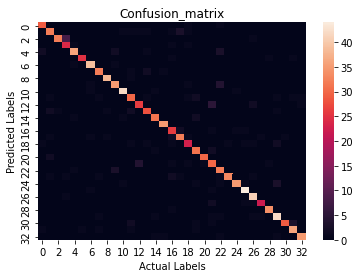

In [ ]:
ax=plt.subplot()
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(cm,ax=ax)
ax.set_title('Confusion_matrix')
ax.set_ylabel('Predicted Labels')
ax.set_xlabel('Actual Labels')


In [ ]:
classes=list(df2.y.unique())
classes.sort()

In [ ]:
def find_intent(sentence):
  x=np.asarray([sentence])
  y=model5.predict(x)
  z=np.argmax(y)
  return classes[z]

In [ ]:
find_intent('ನಾನು ಇಂಗ್ಲಿಷ್ ಕಲಿಯಬೇಕು')

1/1 [==============================] - 0s 55ms/step


'translate'